### Import Librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
#Read the dataset into the notebook
df = pd.read_csv('Final_Kickstarter_2021.csv')

In [3]:
#shape of the data
df.shape

(1125555, 41)

In [4]:
#Head of the data
df.head(3)

Unnamed: 0  Unnamed: 0.1  backers_count  \
0           0             0             56   
1           1             1              1   
2           2             2             35   

                                               blurb  \
0  The Backyard will be a community garden in Lak...   
1  Modern London is home to a poverty driven ambi...   
2  Announcing a twist of our original party game ...   

                                            category  \
0  {"id":305,"name":"Community Gardens","slug":"f...   
1  {"id":293,"name":"Drama","slug":"film & video/...   
2  {"id":273,"name":"Playing Cards","slug":"games...   

   converted_pledged_amount country country_displayable_name  created_at  \
0                      5507      US        the United States  1487809696   
1                         1      GB       the United Kingdom  1469267948   
2                      1119      US        the United States  1519236804   

                                             creator  ...  \
0  {"id":2723718,"name":"The Backyard","is_regist...  ...   
1  {"id":2084330677,"name":"Lee Bartlett","is_reg...  ...   
2  {"id":1978836496,"name":"I Can't Even! Game","...  ...   

                                          source_url spotlight  staff_pick  \
0  https://www.kickstarter.com/discover/categorie...      True       False   
1  https://www.kickstarter.com/discover/categorie...     False       False   
2  https://www.kickstarter.com/discover/categorie...      True       False   

        state  state_changed_at  static_usd_rate  \
0  successful        1491789637         1.000000   
1      failed        1471870195         1.322344   
2  successful        1532956446         1.000000   

                                                urls  usd_pledged  usd_type  \
0  {"web":{"project":"https://www.kickstarter.com...  5507.770000  domestic   
1  {"web":{"project":"https://www.kickstarter.com...     1.322344  domestic   
2  {"web":{"project":"https://www.kickstarter.com...  1119.000000  domestic   

   usd_exchange_rate  
0                NaN  
1                NaN  
2                NaN  

[3 rows x 41 columns]

In [5]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125555 entries, 0 to 1125554
Data columns (total 41 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1125555 non-null  int64  
 1   Unnamed: 0.1              1125555 non-null  int64  
 2   backers_count             1125555 non-null  int64  
 3   blurb                     1125514 non-null  object 
 4   category                  1125555 non-null  object 
 5   converted_pledged_amount  1125555 non-null  int64  
 6   country                   1125555 non-null  object 
 7   country_displayable_name  1125555 non-null  object 
 8   created_at                1125555 non-null  int64  
 9   creator                   1125555 non-null  object 
 10  currency                  1125555 non-null  object 
 11  currency_symbol           1125555 non-null  object 
 12  currency_trailing_code    1125555 non-null  bool   
 13  current_currency          1

In [6]:
df.describe()

Unnamed: 0  Unnamed: 0.1  backers_count  converted_pledged_amount  \
count  1.125555e+06  1.125555e+06   1.125555e+06              1.125555e+06   
mean   5.627770e+05  1.069005e+05   1.617265e+02              1.503447e+04   
std    3.249199e+05  6.431497e+04   9.668627e+02              1.129771e+05   
min    0.000000e+00  0.000000e+00   0.000000e+00              0.000000e+00   
25%    2.813885e+05  5.003300e+04   4.000000e+00              1.480000e+02   
50%    5.627770e+05  1.063110e+05   3.100000e+01              1.790000e+03   
75%    8.441655e+05  1.625885e+05   9.900000e+01              7.287000e+03   
max    1.125554e+06  2.244560e+05   1.058570e+05              1.138545e+07   

         created_at      deadline       fx_rate          goal            id  \
count  1.125555e+06  1.125555e+06  1.125555e+06  1.125555e+06  1.125555e+06   
mean   1.488891e+09  1.496023e+09  1.007269e+00  5.236913e+04  1.072995e+09   
std    8.200404e+07  8.186586e+07  2.441534e-01  1.249529e+06  6.192982e+08   
min    1.240366e+09  1.242468e+09  7.886620e-03  1.000000e-02  1.852000e+04   
25%    1.426130e+09  1.432564e+09  1.000000e+00  1.500000e+03  5.364529e+08   
50%    1.488838e+09  1.495786e+09  1.000000e+00  5.000000e+03  1.072812e+09   
75%    1.563284e+09  1.570792e+09  1.000000e+00  1.500000e+04  1.609010e+09   
max    1.623882e+09  1.629080e+09  1.167033e+01  1.000000e+08  2.147476e+09   

        launched_at       pledged  state_changed_at  static_usd_rate  \
count  1.125555e+06  1.125555e+06      1.125555e+06     1.125555e+06   
mean   1.493173e+09  3.139980e+04      1.495857e+09     1.000651e+00   
std    8.187327e+07  1.329300e+06      8.174554e+07     2.453672e-01   
min    1.240674e+09  0.000000e+00      1.242468e+09     8.770720e-03   
25%    1.429681e+09  1.540000e+02      1.432418e+09     1.000000e+00   
50%    1.492974e+09  1.870000e+03      1.495724e+09     1.000000e+00   
75%    1.567743e+09  7.880000e+03      1.570717e+09     1.000000e+00   
max    1.623899e+09  4.816218e+08      1.623902e+09     1.716408e+00   

        usd_pledged  usd_exchange_rate  
count  1.125555e+06      255678.000000  
mean   1.502587e+04           1.002685  
std    1.128523e+05           0.244964  
min    0.000000e+00           0.008768  
25%    1.490000e+02           1.000000  
50%    1.791000e+03           1.000000  
75%    7.287000e+03           1.000000  
max    1.138545e+07           1.716408

In [7]:
# Check for null values 
df.isnull().sum()

Unnamed: 0                        0
Unnamed: 0.1                      0
backers_count                     0
blurb                            41
category                          0
converted_pledged_amount          0
country                           0
country_displayable_name          0
created_at                        0
creator                           0
currency                          0
currency_symbol                   0
currency_trailing_code            0
current_currency                  0
deadline                          0
disable_communication             0
friends                     1124763
fx_rate                           0
goal                              0
id                                0
is_backing                  1124763
is_starrable                      0
is_starred                  1124763
launched_at                       0
location                       1068
name                              0
permissions                 1124763
photo                       

In [8]:
#Drop The unwanted & More than 70% null values Columns
df.drop(columns = (['Unnamed: 0','Unnamed: 0.1','friends','is_backing','is_starred','permissions','usd_exchange_rate']),inplace=True)

In [9]:
df.shape

(1125555, 34)

In [10]:
# Check for null values 
df.isnull().sum()

backers_count                  0
blurb                         41
category                       0
converted_pledged_amount       0
country                        0
country_displayable_name       0
created_at                     0
creator                        0
currency                       0
currency_symbol                0
currency_trailing_code         0
current_currency               0
deadline                       0
disable_communication          0
fx_rate                        0
goal                           0
id                             0
is_starrable                   0
launched_at                    0
location                    1068
name                           0
photo                          0
pledged                        0
profile                        0
slug                           0
source_url                     0
spotlight                      0
staff_pick                     0
state                          0
state_changed_at               0
static_usd

In [11]:
#Fill The Null Values Using Mode
df.fillna(df["blurb"].mode()[0],inplace=True)
df.fillna(df["location"].mode()[0],inplace=True)
df.fillna(df["usd_type"].mode()[0],inplace=True)

In [12]:
# Check for null values 
df.isnull().sum()

backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
country_displayable_name    0
created_at                  0
creator                     0
currency                    0
currency_symbol             0
currency_trailing_code      0
current_currency            0
deadline                    0
disable_communication       0
fx_rate                     0
goal                        0
id                          0
is_starrable                0
launched_at                 0
location                    0
name                        0
photo                       0
pledged                     0
profile                     0
slug                        0
source_url                  0
spotlight                   0
staff_pick                  0
state                       0
state_changed_at            0
static_usd_rate             0
urls                        0
usd_pledged                 0
usd_type  

In [13]:
df.head(3)

backers_count                                              blurb  \
0             56  The Backyard will be a community garden in Lak...   
1              1  Modern London is home to a poverty driven ambi...   
2             35  Announcing a twist of our original party game ...   

                                            category  \
0  {"id":305,"name":"Community Gardens","slug":"f...   
1  {"id":293,"name":"Drama","slug":"film & video/...   
2  {"id":273,"name":"Playing Cards","slug":"games...   

   converted_pledged_amount country country_displayable_name  created_at  \
0                      5507      US        the United States  1487809696   
1                         1      GB       the United Kingdom  1469267948   
2                      1119      US        the United States  1519236804   

                                             creator currency currency_symbol  \
0  {"id":2723718,"name":"The Backyard","is_regist...      USD               $   
1  {"id":2084330677,"name":"Lee Bartlett","is_reg...      GBP               £   
2  {"id":1978836496,"name":"I Can't Even! Game","...      USD               $   

   ...                                               slug  \
0  ...                      the-backyard-community-garden   
1  ...                                    rocks-to-stocks   
2  ...  i-cant-even-a-party-game-expansion-pack-ice-to-go   

                                          source_url  spotlight  staff_pick  \
0  https://www.kickstarter.com/discover/categorie...       True       False   
1  https://www.kickstarter.com/discover/categorie...      False       False   
2  https://www.kickstarter.com/discover/categorie...       True       False   

        state  state_changed_at  static_usd_rate  \
0  successful        1491789637         1.000000   
1      failed        1471870195         1.322344   
2  successful        1532956446         1.000000   

                                                urls  usd_pledged  usd_type  
0  {"web":{"project":"https://www.kickstarter.com...  5507.770000  domestic  
1  {"web":{"project":"https://www.kickstarter.com...     1.322344  domestic  
2  {"web":{"project":"https://www.kickstarter.com...  1119.000000  domestic  

[3 rows x 34 columns]

In [14]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'fx_rate',
       'goal', 'id', 'is_starrable', 'launched_at', 'location', 'name',
       'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'urls',
       'usd_pledged', 'usd_type'],
      dtype='object')

In [15]:
df.select_dtypes(include='number').dtypes

backers_count                 int64
converted_pledged_amount      int64
created_at                    int64
deadline                      int64
fx_rate                     float64
goal                        float64
id                            int64
launched_at                   int64
pledged                     float64
state_changed_at              int64
static_usd_rate             float64
usd_pledged                 float64
dtype: object

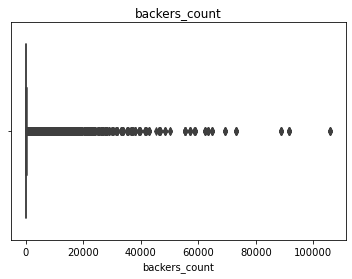

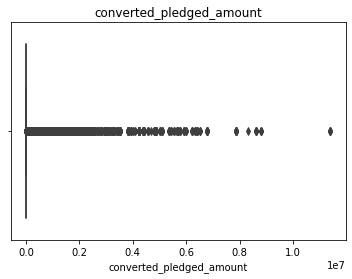

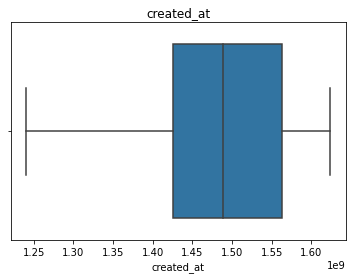

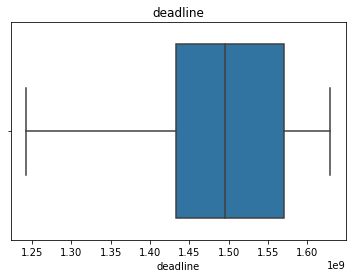

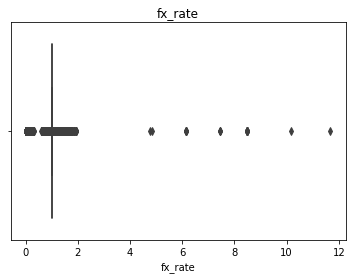

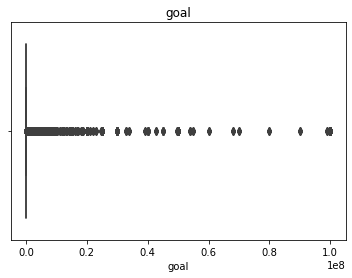

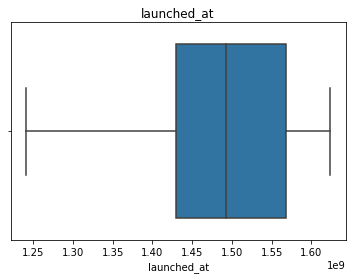

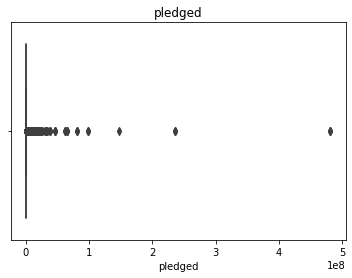

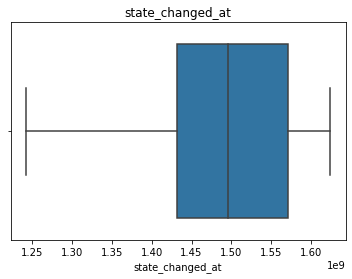

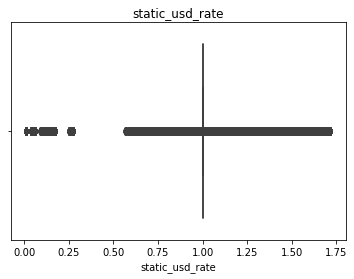

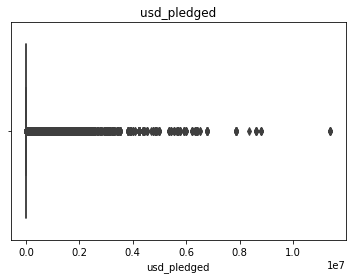

In [16]:
#before Cleaning outliers
sns.boxplot(df['backers_count'])
plt.title('backers_count')
plt.show()

sns.boxplot(df['converted_pledged_amount'])
plt.title('converted_pledged_amount')
plt.show()

sns.boxplot(df['created_at'])
plt.title('created_at')
plt.show()

sns.boxplot(df['deadline'])
plt.title('deadline')
plt.show()

sns.boxplot(df['fx_rate'])
plt.title('fx_rate')
plt.show()


sns.boxplot(df['goal'])
plt.title('goal')
plt.show()

sns.boxplot(df['launched_at'])
plt.title('launched_at')
plt.show()

sns.boxplot(df['pledged'])
plt.title('pledged')
plt.show()

sns.boxplot(df['state_changed_at'])
plt.title('state_changed_at')
plt.show()

sns.boxplot(df['static_usd_rate'])
plt.title('static_usd_rate')
plt.show()

sns.boxplot(df['usd_pledged'])
plt.title('usd_pledged')
plt.show()




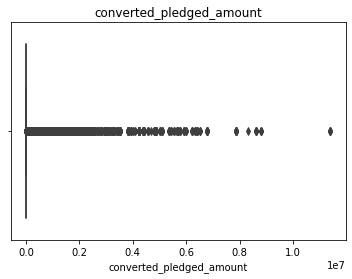

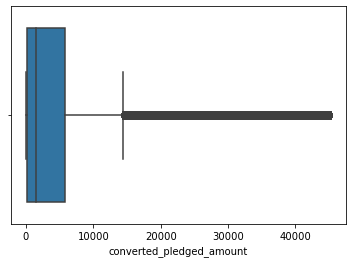

In [17]:
#before Cleaning outliers

sns.boxplot(df['converted_pledged_amount'])
plt.title('converted_pledged_amount')
plt.show()

#Cleaning outliers
converted_1 = df['converted_pledged_amount'].quantile(0.95)
df_1 = df[df['converted_pledged_amount']<converted_1]

#After Cleaning outliers
sns.boxplot(df_1['converted_pledged_amount'])
plt.show()

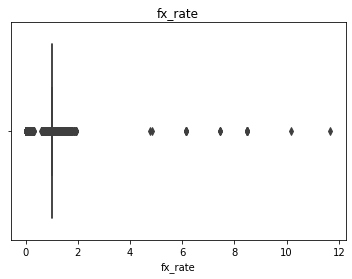

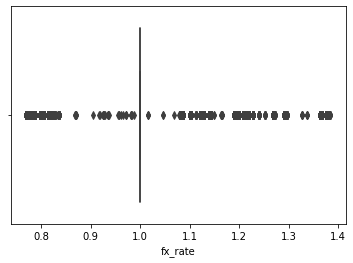

In [18]:
#before Cleaning outliers
sns.boxplot(df_1['fx_rate'])
plt.title('fx_rate')
plt.show()

#Cleaning outliers
lower = df_1['fx_rate'].quantile(0.05)
upper = df_1['fx_rate'].quantile(0.95)

df_2 = df_1[(df_1['fx_rate']>lower) & (df_1['fx_rate']<upper)]

#After Cleaning outliers
sns.boxplot(df_2['fx_rate'])
plt.show()


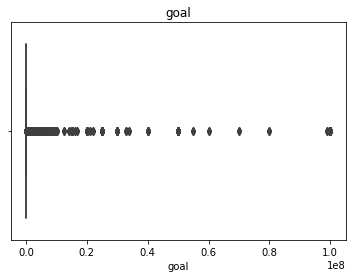

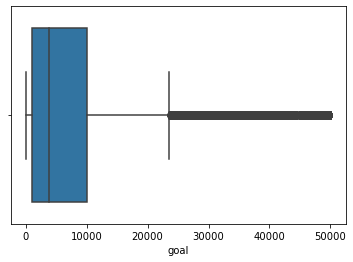

In [19]:
#before Cleaning outliers

sns.boxplot(df_2['goal'])
plt.title('goal')
plt.show()

#Cleaning outliers
goal_1 = df_2['goal'].quantile(0.95)
df_3 = df_2[df_2['goal']<goal_1]

#After Cleaning outliers
sns.boxplot(df_3['goal'])
plt.show()

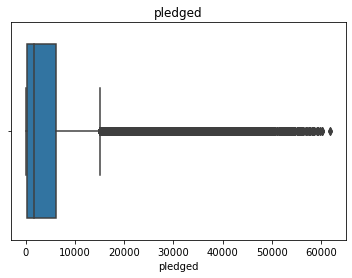

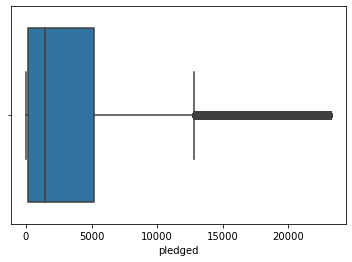

In [20]:
#before Cleaning outliers

sns.boxplot(df_3['pledged'])
plt.title('pledged')
plt.show()

#Cleaning outliers
pledged_1 = df_3['pledged'].quantile(0.95)
df_4 = df_3[df_3['pledged']<pledged_1]

#After Cleaning outliers
sns.boxplot(df_4['pledged'])
plt.show()

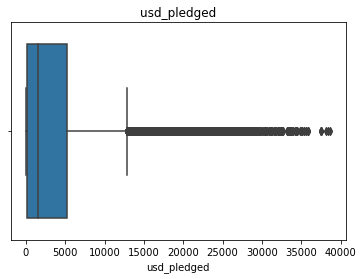

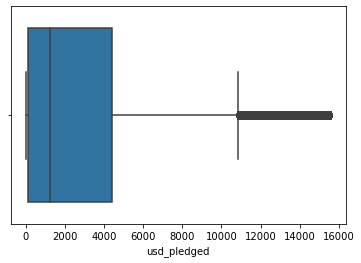

In [21]:
#before Cleaning outliers

sns.boxplot(df_4['usd_pledged'])
plt.title('usd_pledged')
plt.show()

#Cleaning outliers
usd_1 = df_4['usd_pledged'].quantile(0.95)
df_5 = df_4[df_4['usd_pledged']<usd_1]

#After Cleaning outliers
sns.boxplot(df_5['usd_pledged'])
plt.show()

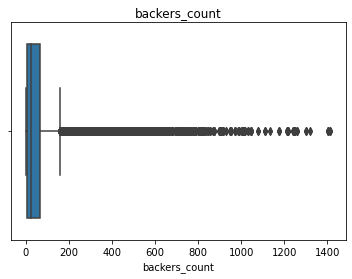

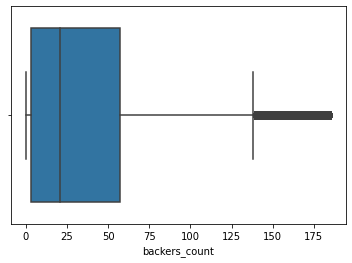

In [22]:
#before Cleaning outliers

sns.boxplot(df_5['backers_count'])
plt.title('backers_count')
plt.show()

#Cleaning outliers
converted_1 = df_5['backers_count'].quantile(0.95)
df_6 = df_5[df_5['backers_count']<converted_1]

#After Cleaning outliers
sns.boxplot(df_6['backers_count'])
plt.show()

In [23]:
df_6.shape

(769401, 34)

<AxesSubplot:xlabel='backers_count', ylabel='Density'>

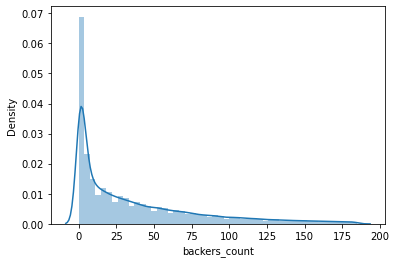

In [24]:
sns.distplot(df_6['backers_count'])

<AxesSubplot:xlabel='usd_pledged', ylabel='Density'>

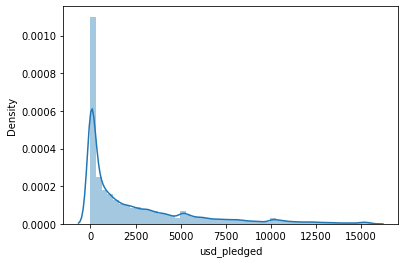

In [25]:
sns.distplot(df_6['usd_pledged'])

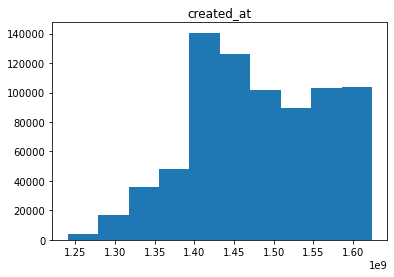

In [26]:
plt.hist(df_6.created_at )
plt.title('created_at')
plt.show()

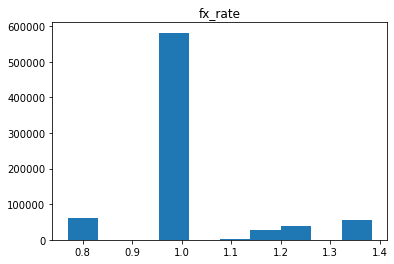

In [27]:
plt.hist(df_6.fx_rate )
plt.title('fx_rate')
plt.show()

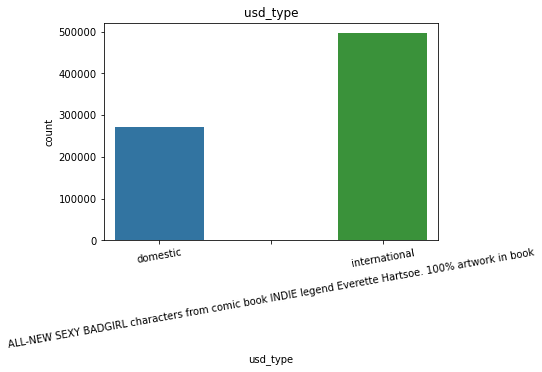

In [28]:
sns.countplot(x = 'usd_type', data = df_6 )
plt.title('usd_type')
plt.xticks(rotation=10)
plt.show()

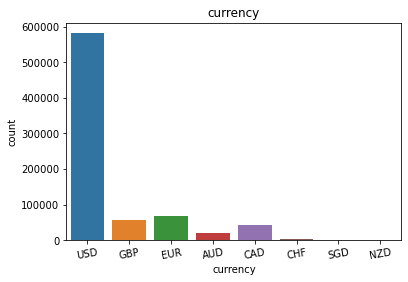

In [29]:
sns.countplot(x = 'currency', data = df_6 )
plt.title('currency')
plt.xticks(rotation=10)
plt.show()

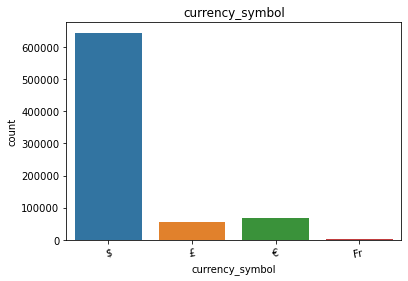

In [30]:
sns.countplot(x = 'currency_symbol', data = df_6 )
plt.title('currency_symbol')
plt.xticks(rotation=10)
plt.show()

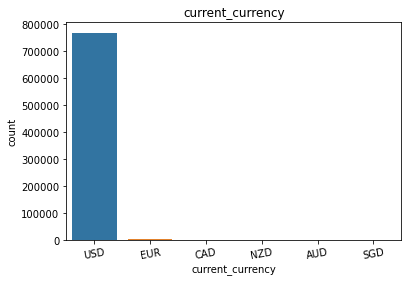

In [31]:
sns.countplot(x = 'current_currency', data = df_6 )
plt.title('current_currency')
plt.xticks(rotation=10)
plt.show()

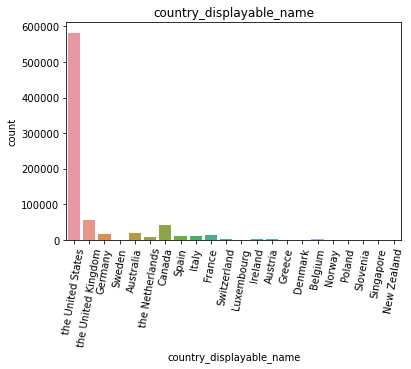

In [32]:
sns.countplot(x = 'country_displayable_name', data = df_6 )
plt.title('country_displayable_name')
plt.xticks(rotation=80)
plt.show()

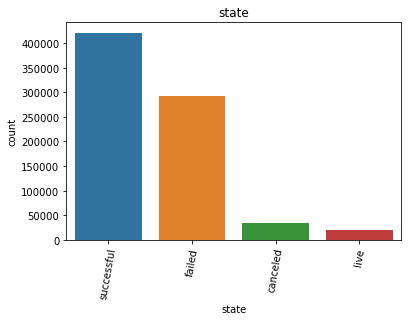

In [33]:
sns.countplot(x = 'state', data = df_6 )
plt.title('state')
plt.xticks(rotation=80)
plt.show()

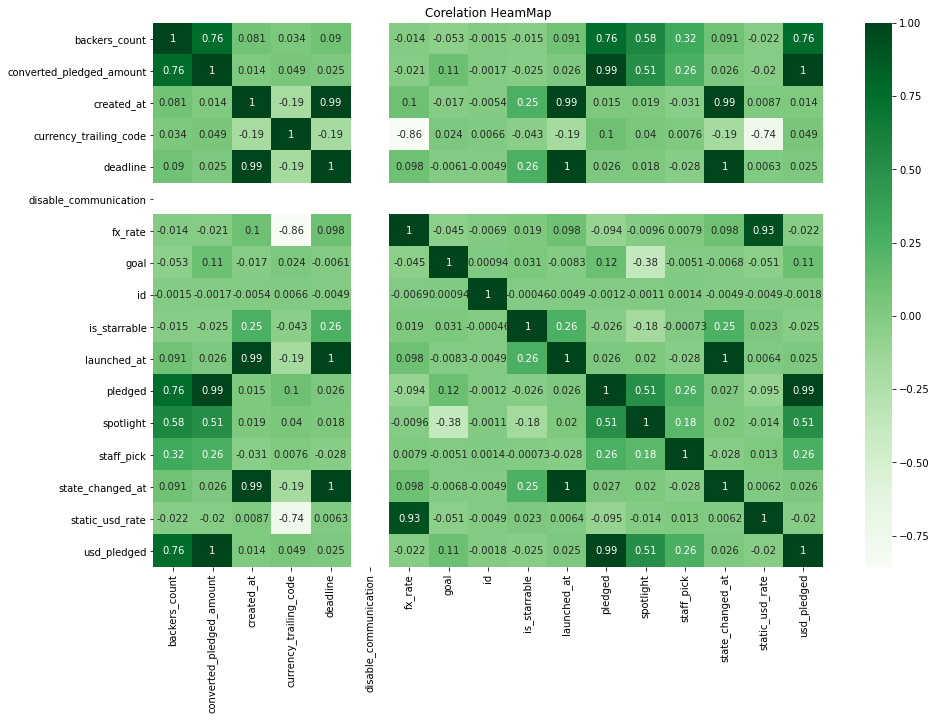

In [34]:
corr = df_6.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True , cmap = 'Greens')
plt.title('Corelation HeamMap')
plt.show()

In [35]:
df.select_dtypes(include='number').dtypes

backers_count                 int64
converted_pledged_amount      int64
created_at                    int64
deadline                      int64
fx_rate                     float64
goal                        float64
id                            int64
launched_at                   int64
pledged                     float64
state_changed_at              int64
static_usd_rate             float64
usd_pledged                 float64
dtype: object

In [36]:
df.select_dtypes(include='object').dtypes

blurb                       object
category                    object
country                     object
country_displayable_name    object
creator                     object
currency                    object
currency_symbol             object
current_currency            object
location                    object
name                        object
photo                       object
profile                     object
slug                        object
source_url                  object
state                       object
urls                        object
usd_type                    object
dtype: object

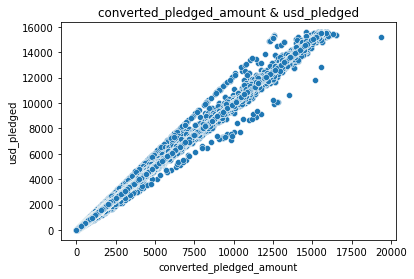

In [37]:
sns.scatterplot(x = 'converted_pledged_amount', y = 'usd_pledged', data = df_6)
plt.title('converted_pledged_amount & usd_pledged')
plt.show()

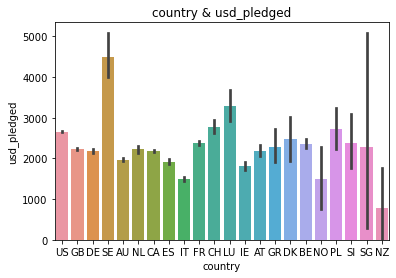

In [38]:
sns.barplot(x = 'country', y = 'usd_pledged', data = df_6 )
plt.title('country & usd_pledged')
plt.show()

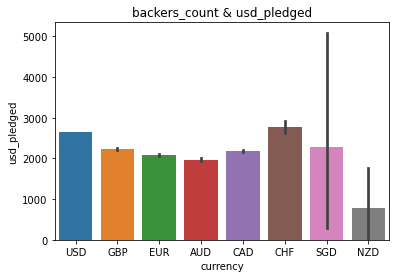

In [39]:
sns.barplot(x = 'currency', y = 'usd_pledged', data = df_6 )
plt.title('backers_count & usd_pledged')
plt.show()

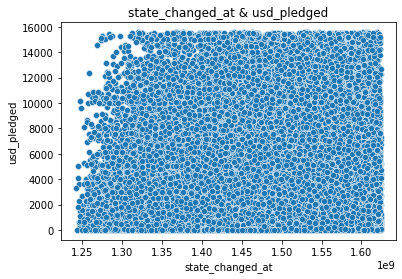

In [40]:
sns.scatterplot(x = 'state_changed_at', y = 'usd_pledged', data = df_6)
plt.title('state_changed_at & usd_pledged')
plt.show()

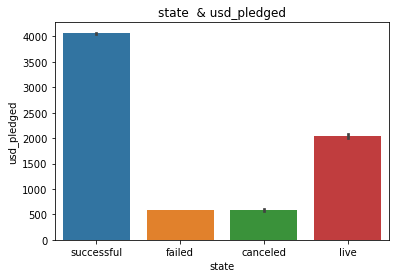

In [41]:
sns.barplot(x = 'state', y = 'usd_pledged', data = df_6)
plt.title('state  & usd_pledged')
plt.show()

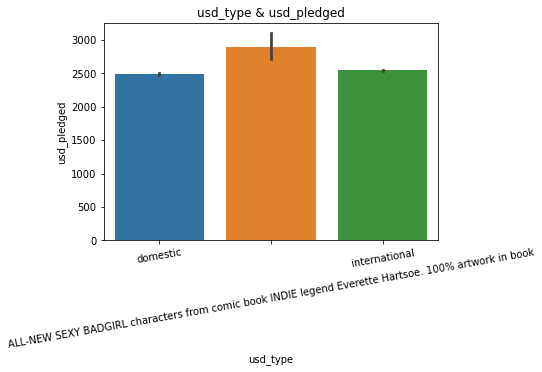

In [42]:
sns.barplot(x = 'usd_type', y = 'usd_pledged', data = df_6 )
plt.title('usd_type & usd_pledged')
plt.xticks(rotation=10)
plt.show()

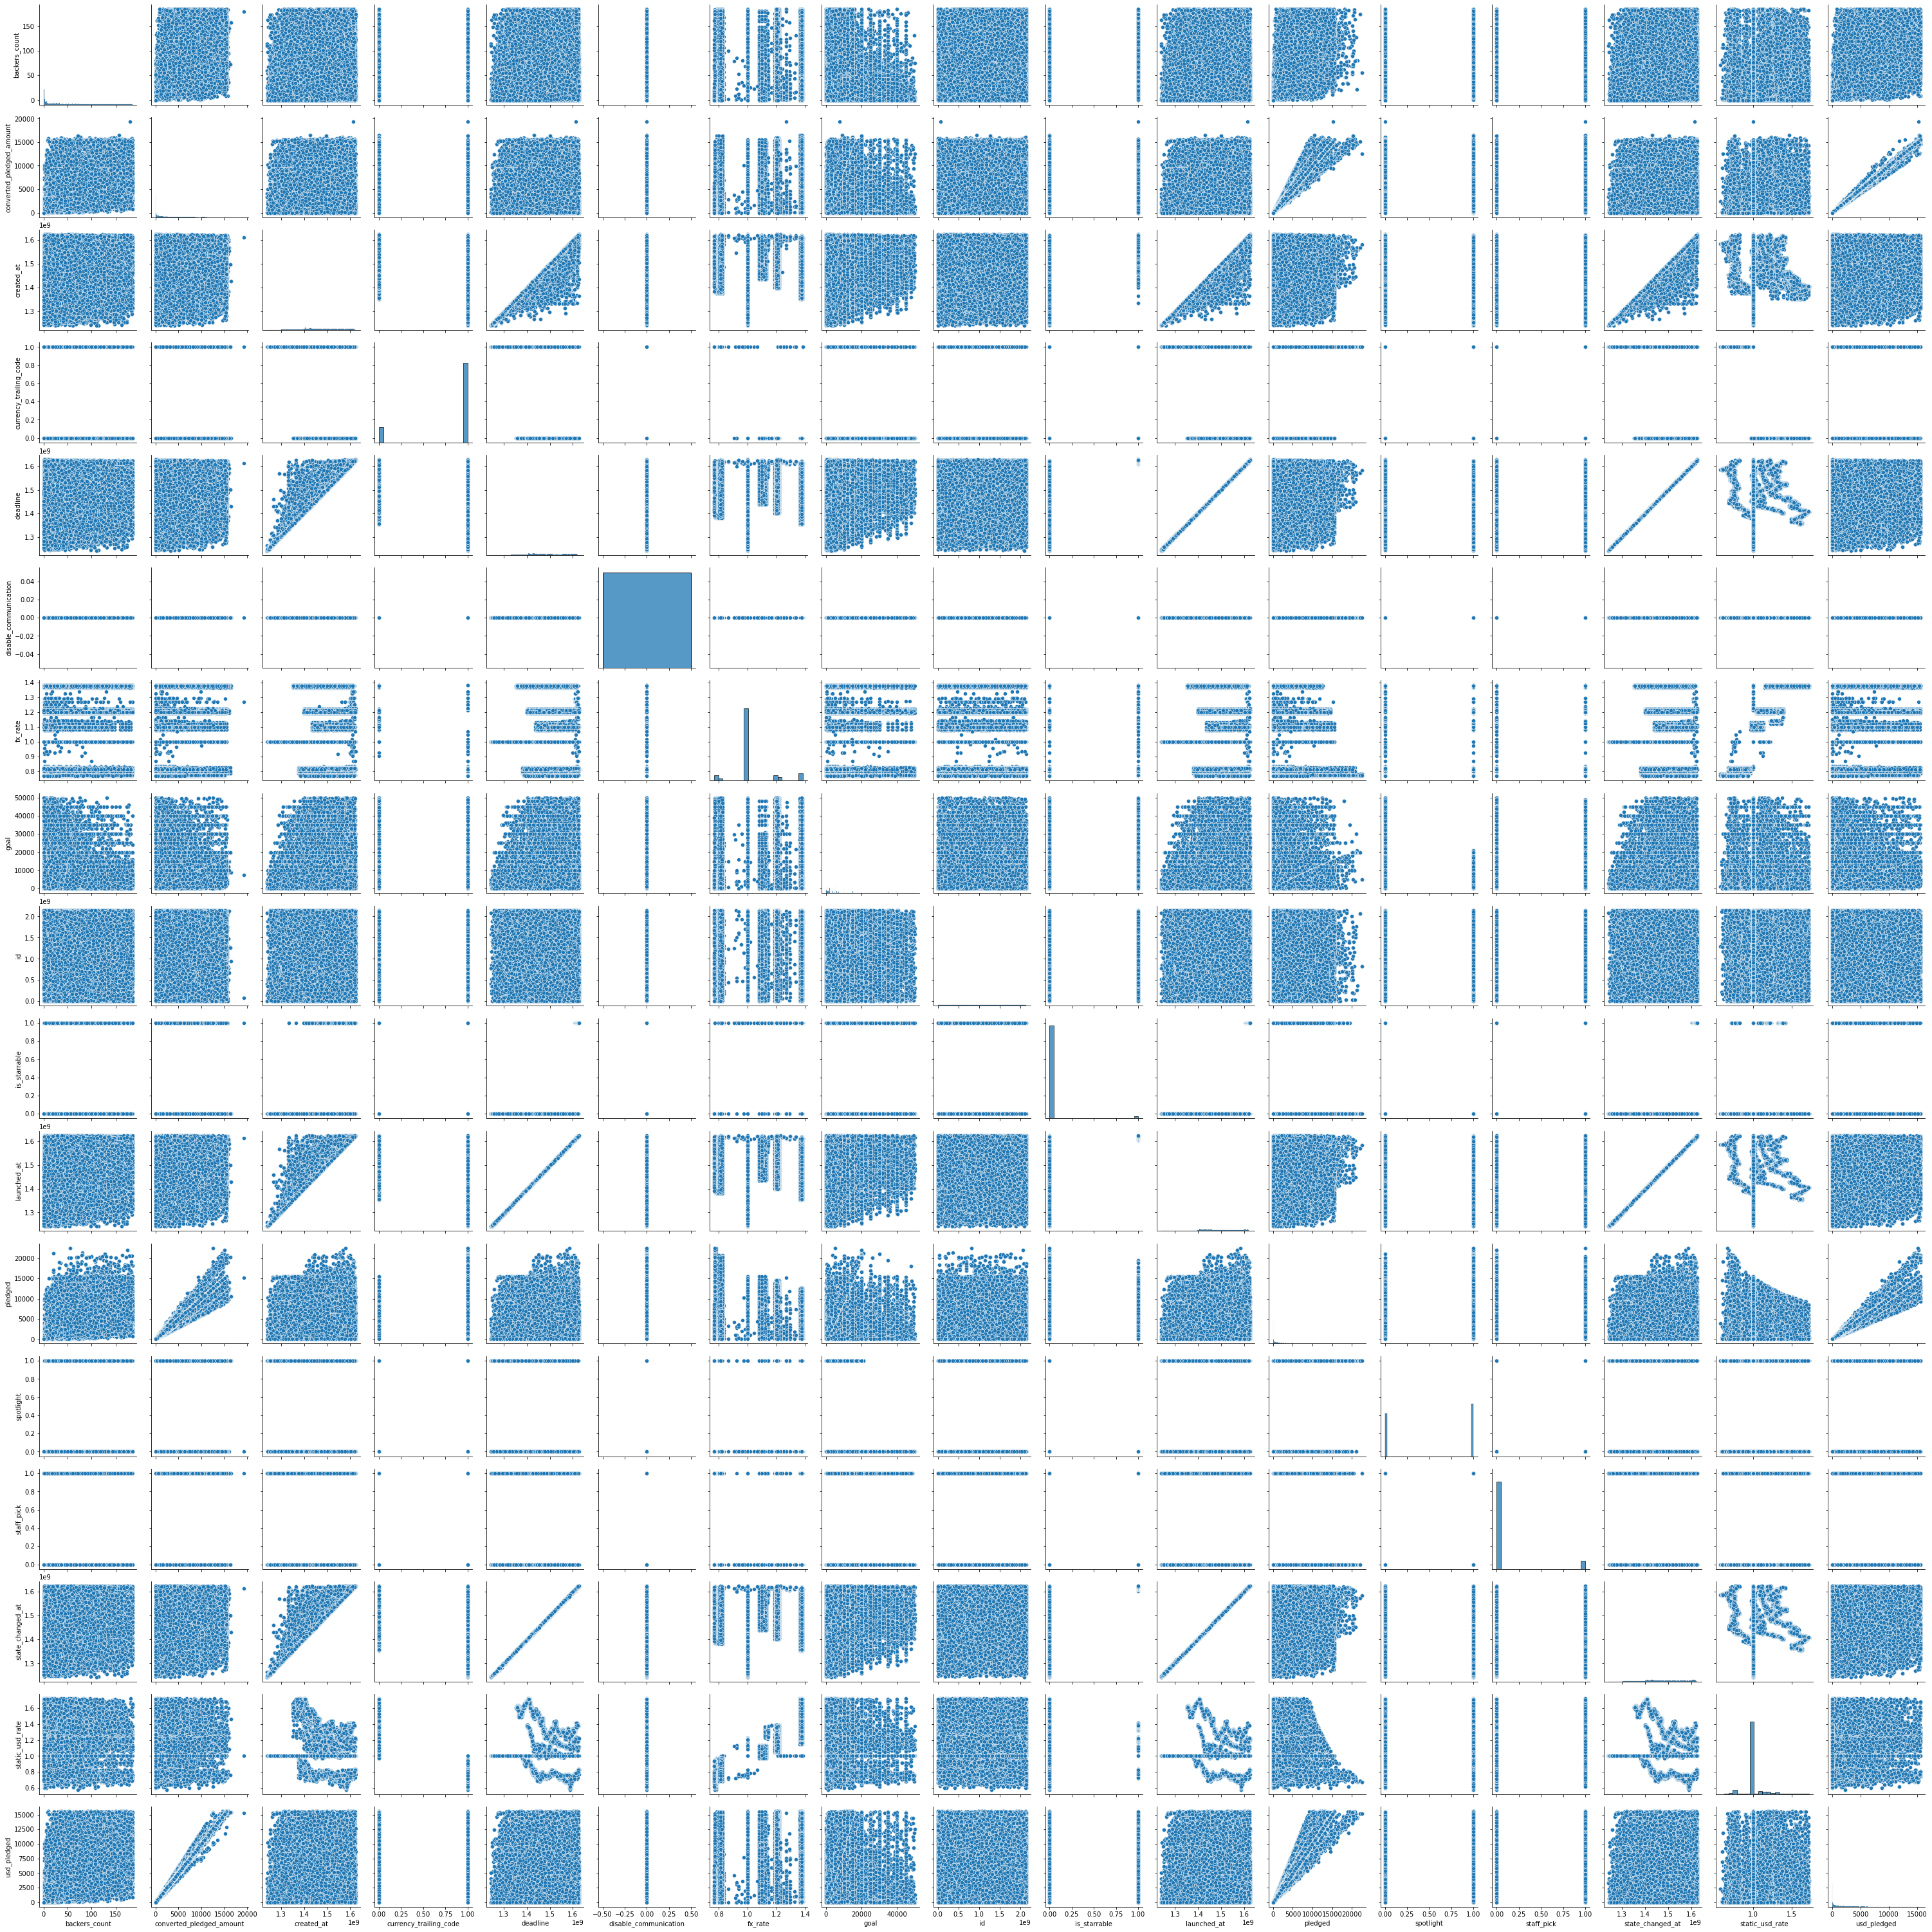

In [43]:
sns.pairplot(df_6)
plt.show()

In [44]:
df_6.head(2)

backers_count                                              blurb  \
0             56  The Backyard will be a community garden in Lak...   
1              1  Modern London is home to a poverty driven ambi...   

                                            category  \
0  {"id":305,"name":"Community Gardens","slug":"f...   
1  {"id":293,"name":"Drama","slug":"film & video/...   

   converted_pledged_amount country country_displayable_name  created_at  \
0                      5507      US        the United States  1487809696   
1                         1      GB       the United Kingdom  1469267948   

                                             creator currency currency_symbol  \
0  {"id":2723718,"name":"The Backyard","is_regist...      USD               $   
1  {"id":2084330677,"name":"Lee Bartlett","is_reg...      GBP               £   

   ...                           slug  \
0  ...  the-backyard-community-garden   
1  ...                rocks-to-stocks   

                                          source_url  spotlight  staff_pick  \
0  https://www.kickstarter.com/discover/categorie...       True       False   
1  https://www.kickstarter.com/discover/categorie...      False       False   

        state  state_changed_at  static_usd_rate  \
0  successful        1491789637         1.000000   
1      failed        1471870195         1.322344   

                                                urls  usd_pledged  usd_type  
0  {"web":{"project":"https://www.kickstarter.com...  5507.770000  domestic  
1  {"web":{"project":"https://www.kickstarter.com...     1.322344  domestic  

[2 rows x 34 columns]

In [45]:
df_6.head(2)

backers_count                                              blurb  \
0             56  The Backyard will be a community garden in Lak...   
1              1  Modern London is home to a poverty driven ambi...   

                                            category  \
0  {"id":305,"name":"Community Gardens","slug":"f...   
1  {"id":293,"name":"Drama","slug":"film & video/...   

   converted_pledged_amount country country_displayable_name  created_at  \
0                      5507      US        the United States  1487809696   
1                         1      GB       the United Kingdom  1469267948   

                                             creator currency currency_symbol  \
0  {"id":2723718,"name":"The Backyard","is_regist...      USD               $   
1  {"id":2084330677,"name":"Lee Bartlett","is_reg...      GBP               £   

   ...                           slug  \
0  ...  the-backyard-community-garden   
1  ...                rocks-to-stocks   

                                          source_url  spotlight  staff_pick  \
0  https://www.kickstarter.com/discover/categorie...       True       False   
1  https://www.kickstarter.com/discover/categorie...      False       False   

        state  state_changed_at  static_usd_rate  \
0  successful        1491789637         1.000000   
1      failed        1471870195         1.322344   

                                                urls  usd_pledged  usd_type  
0  {"web":{"project":"https://www.kickstarter.com...  5507.770000  domestic  
1  {"web":{"project":"https://www.kickstarter.com...     1.322344  domestic  

[2 rows x 34 columns]

In [46]:
df_6.shape

(769401, 34)

In [47]:
df_6.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'fx_rate',
       'goal', 'id', 'is_starrable', 'launched_at', 'location', 'name',
       'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'urls',
       'usd_pledged', 'usd_type'],
      dtype='object')

In [48]:
df_6.select_dtypes(include='object').nunique()

blurb                       152590
category                       342
country                         22
country_displayable_name        22
creator                     766745
currency                         8
currency_symbol                  4
current_currency                 6
location                     78953
name                        153456
photo                       280038
profile                     281543
slug                        153743
source_url                     171
state                            4
urls                        154483
usd_type                         3
dtype: int64

In [49]:
df_6 = df_6.drop(columns = (['category','blurb','creator','location','name','photo','profile','source_url','slug','urls','id']),axis = 1)

In [50]:
df_6.columns

Index(['backers_count', 'converted_pledged_amount', 'country',
       'country_displayable_name', 'created_at', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'is_starrable',
       'launched_at', 'pledged', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'usd_pledged', 'usd_type'],
      dtype='object')

### X & Y Spleat 

In [51]:
#split dependent variables and independent variables
X = df_6.drop(columns = 'usd_pledged',axis=1)
Y = df_6['usd_pledged']

### LabelEncoder

In [52]:
enc = LabelEncoder()
X.loc[:,:]= \
X.loc[:,:].apply(enc.fit_transform)

In [53]:
X.head()

backers_count  converted_pledged_amount  country  country_displayable_name  \
0             56                      5502       21                        21   
1              1                         1        9                        20   
2             35                      1119       21                        21   
4              0                         0       21                        21   
5             14                       766       21                        21   

   created_at  currency  currency_symbol  currency_trailing_code  \
0       85503         7                0                       1   
1       75751         4                2                       0   
2      101960         7                0                       1   
4       41261         7                0                       1   
5       99800         7                0                       1   

   current_currency  deadline  ...  goal  is_starrable  launched_at  pledged  \
0                 5     80387  ...  2003             0        84195    13684   
1                 5     70231  ...  3780             0        73692        1   
2                 5    100936  ...   650             0       105581     3735   
4                 5     36256  ...   703             0        38187        0   
5                 5     93825  ...   387             0        98130     2611   

   spotlight  staff_pick  state  state_changed_at  static_usd_rate  usd_type  
0          1           0      3             80948             4117         1  
1          0           0      1             70777             7714         1  
2          1           0      3            101547             4117         1  
4          0           0      0             35140             4117         1  
5          1           0      3             94408             4117         1  

[5 rows x 22 columns]

In [54]:
print(X.shape,Y.shape)

(769401, 22) (769401,)


In [55]:
Y.value_counts()

0.000000        61733
1.000000        20652
2.000000         5003
10.000000        4566
25.000000        4093
                ...  
5729.000000         1
14739.000000        1
13.084755           1
10930.819483        1
64.379533           1
Name: usd_pledged, Length: 59585, dtype: int64

In [56]:
#Normalizing the data
scale = StandardScaler()
#fit the StandardScaler
train_st=scale.fit_transform(X)

In [57]:
#X_train & Y_train split

x_train,x_test,y_train,y_test = train_test_split(train_st,Y,test_size = 0.3,random_state=40)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(538580, 22) (230821, 22)
(538580,) (230821,)


## Lasso Regression

In [58]:
#Lasso Regression model
lassoR = Lasso(alpha=1)
#Lasso Regression model Fitting
lassoR_fit = lassoR.fit(x_train, y_train)
lassoR_fit

Lasso(alpha=1)

In [59]:
# Predict The x_test Data
y_pred_lasso = lassoR_fit.predict(x_test)

In [60]:
#Lasso Regression model metrics

mse = mean_squared_error (y_test, y_pred_lasso)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_lasso))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", lassoR_fit.score(x_train, y_train))
print ("test set score :", lassoR_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.9982087123940943
RMSE : 140.6729658331743
mse : 19788.883316301417
training set score : 0.9982059778711676
test set score : 0.9982087123940943


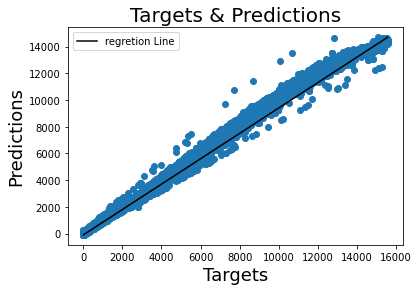

In [61]:
# Plot Targets Data & Predictions Data
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(),y_test.max()],[y_pred_lasso.min(),y_pred_lasso.max()], color = 'black' , label = 'regretion Line')
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()
#linearly Coreleted Eatch Other

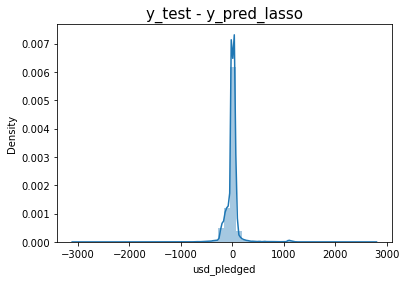

In [62]:
#plot Concrete Density Variable 

sns.distplot(y_test-y_pred_lasso)
plt.title('y_test - y_pred_lasso',size=15)
plt.show()

### HyperParameter Tuning For Lasso Regression

In [63]:
param_lasso=np.linspace(1,10,100)
param_grid_lasso={'alpha':param_lasso}

grid_search_lasso=GridSearchCV(estimator=lassoR,
                               param_grid=param_grid_lasso,
                               cv=5,
                               scoring='neg_mean_absolute_error')
grid_search_lasso_fit = grid_search_lasso.fit(x_train,y_train)
grid_search_lasso_fit

GridSearchCV(cv=5, estimator=Lasso(alpha=1),
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454...
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
         

In [64]:
print('best_score_ :',grid_search_lasso_fit.best_score_)
print('best_params_ :',grid_search_lasso_fit.best_params_)
print('best_estimator_ :',grid_search_lasso_fit.best_estimator_)

best_score_ : -64.54089655659932
best_params_ : {'alpha': 3.5454545454545454}
best_estimator_ : Lasso(alpha=3.5454545454545454)


## Ridge Regression

In [65]:
#Ridge Regression model
ridgeR = Ridge(alpha=1)
#Ridge Regression model Fitting
ridgeR_fit = ridgeR.fit(x_train, y_train)
ridgeR_fit

Ridge(alpha=1)

In [66]:
print('intercept : ' , ridgeR_fit.intercept_)
print('coefficient : ' , ridgeR_fit.coef_)

intercept :  2528.723790657251
coefficient :  [-1.50337390e+01  4.00625017e+03 -4.02884651e+00  2.98383120e+00
 -6.28148011e+00  1.58388615e+00 -5.06889546e+00 -2.18899793e+01
 -6.18261968e+00 -5.71272072e+00  0.00000000e+00 -5.03322606e+01
 -2.48590094e+00  9.93250554e-01  6.82045726e+01 -7.04773436e+02
  1.03209573e+01 -6.03062929e-01  7.04523423e+00 -5.37195657e+01
 -1.37224116e+01 -5.20258101e-01]


In [67]:
# Predict The x_test Data
y_pred_ridgeR = ridgeR_fit.predict(x_test)

In [68]:
#Ridge Regression model metrics

mse = mean_squared_error (y_test, y_pred_ridgeR)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_ridgeR))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", ridgeR_fit.score(x_train, y_train))
print ("test set score :", ridgeR_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.9982374399825293
RMSE : 139.54039257838744
mse : 19471.521160930482
training set score : 0.9982305897009978
test set score : 0.9982374399825293


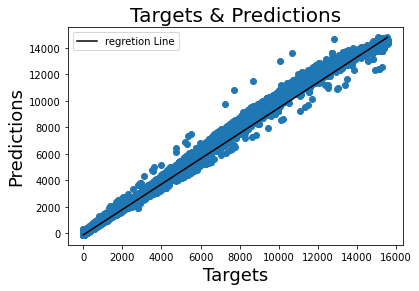

In [69]:
# Plot Targets Data & Predictions Data

plt.scatter(y_test, y_pred_ridgeR)
plt.plot([y_test.min(),y_test.max()],[y_pred_ridgeR.min(),y_pred_ridgeR.max()], color = 'black' , label = 'regretion Line')
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

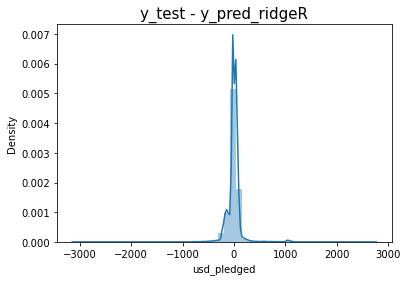

In [70]:
#plot Concrete Density Variable 

sns.distplot(y_test-y_pred_ridgeR)
plt.title('y_test - y_pred_ridgeR',size=15)
plt.show()

### HyperParameter Tuning For Ridge Regression

In [71]:
param_Ridge=np.linspace(1,10,100)
params_Ridge={'alpha':param_Ridge}

grid_search_Ridge=GridSearchCV(estimator=ridgeR,
                               param_grid=params_Ridge,
                               cv=5,
                               scoring='neg_mean_absolute_error')
grid_search_Ridge_fit = grid_search_Ridge.fit(x_train,y_train)
grid_search_Ridge_fit

GridSearchCV(cv=5, estimator=Ridge(alpha=1),
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454...
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
         

In [72]:
print('best_score_ :',grid_search_Ridge_fit.best_score_)
print('best_params_ :',grid_search_Ridge_fit.best_params_)
print('best_estimator_ :',grid_search_Ridge_fit.best_estimator_)

best_score_ : -73.31017611393276
best_params_ : {'alpha': 10.0}
best_estimator_ : Ridge(alpha=10.0)


## GBM

In [73]:
gbm = GradientBoostingRegressor(random_state=101)


#Gradient Boosting Regressor model Fitting
GBM_fit = gbm.fit(x_train, y_train)
GBM_fit

GradientBoostingRegressor(random_state=101)

In [74]:
y_pred_GBM = GBM_fit.predict(x_test)

In [75]:
#Gradient Boosting Regressor model metrics

mse = mean_squared_error (y_test, y_pred_GBM)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_GBM))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", GBM_fit.score(x_train, y_train))
print ("test set score :", GBM_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.9997946368898777
RMSE : 47.63094519690606
mse : 2268.706940350669
training set score : 0.9998053033574965
test set score : 0.9997946368898777


### HyperParameter Tuning For GBM

In [76]:
param_grid = {'n_estimators' : range(30,80,10)}


gscv = GridSearchCV(gbm, param_grid = param_grid, scoring = 'roc_auc', cv = 5, n_jobs = 4)

grid_search_GBM_fit = gscv.fit(x_train,y_train)

In [77]:
print('best_score_ :',grid_search_GBM_fit.best_score_)
print('best_params_ :',grid_search_GBM_fit.best_params_)
print('best_estimator_ :',grid_search_GBM_fit.best_estimator_)

best_score_ : nan
best_params_ : {'n_estimators': 30}
best_estimator_ : GradientBoostingRegressor(n_estimators=30, random_state=101)


In [78]:
Models = pd.DataFrame({'SCORS' : ['R2 Score','RMSE','mse','training set score','test set score','HyperParameter_best_score' ],
           "Lasso Regression":['0.9982087123940943','140.6729658331743','19788.883316301417','0.9982059778711676','0.9982087123940943','-64.54089655659932'],
            "Ridge Regression": ['0.9982374399825293','139.54039257838744','19471.521160930482','0.9982305897009978','0.9982374399825293','-73.31017611393276'] ,
            "GBM" :   ['0.9997946368898777','47.63094519690606','2268.706940350669','0.9998053033574965','0.9997946368898777','nan'] })

Models

SCORS    Lasso Regression    Ridge Regression  \
0                   R2 Score  0.9982087123940943  0.9982374399825293   
1                       RMSE   140.6729658331743  139.54039257838744   
2                        mse  19788.883316301417  19471.521160930482   
3         training set score  0.9982059778711676  0.9982305897009978   
4             test set score  0.9982087123940943  0.9982374399825293   
5  HyperParameter_best_score  -64.54089655659932  -73.31017611393276   

                  GBM  
0  0.9997946368898777  
1   47.63094519690606  
2   2268.706940350669  
3  0.9998053033574965  
4  0.9997946368898777  
5                 nan

#### Gradient Boosting Regressor MODEL is Perform Better Than other model because its R2 Score,RMSE,mse,training set score,test set score,HyperParameter_best_score are better than other models.

In [79]:
import pickle


In [95]:

import pickle



# Make pickle file of our model
pickle.dump(lassoR_fit, open("model.pkl", "wb"))
pickle.dump(GBM_fit, open("model_GBM1.pkl", "wb"))

In [96]:
pickle.dump(y_pred_GBM, open("model_pred.pkl", "wb"))

In [97]:
model = pickle.load(open('model_GBM1.pkl', 'rb'))
model

GradientBoostingRegressor(random_state=101)

In [83]:
print(model.predict([[56,5502,21,21,85503,7,0,1,5,80387,0,45,2003,0,84195,13684,1,0,3,80948,4117,1]]))

[16205.1901916]


In [84]:
X.columns

Index(['backers_count', 'converted_pledged_amount', 'country',
       'country_displayable_name', 'created_at', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'is_starrable',
       'launched_at', 'pledged', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'usd_type'],
      dtype='object')

In [85]:
#save data
X.to_csv(r'X_Kickstart_data.csv')

In [86]:
x = pd.read_csv('X_Kickstart_data.csv')

In [87]:
x.columns

Index(['Unnamed: 0', 'backers_count', 'converted_pledged_amount', 'country',
       'country_displayable_name', 'created_at', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'is_starrable',
       'launched_at', 'pledged', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'usd_type'],
      dtype='object')

In [88]:
df_6.dtypes

backers_count                 int64
converted_pledged_amount      int64
country                      object
country_displayable_name     object
created_at                    int64
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
disable_communication          bool
fx_rate                     float64
goal                        float64
is_starrable                   bool
launched_at                   int64
pledged                     float64
spotlight                      bool
staff_pick                     bool
state                        object
state_changed_at              int64
static_usd_rate             float64
usd_pledged                 float64
usd_type                     object
dtype: object

In [90]:
import sklearn

In [91]:
sklearn_version = sklearn.__version__

print(sklearn_version)

0.24.1


In [ ]:
#pip install scikit-learn

In [ ]:
#!pip uninstall scikit-learn


In [ ]:
#!pip install scikit-learn==0.24.1